# Setting up depedencies

In [35]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [36]:
import sys 
import os
import math
import datetime
import os
import json
import re
import pprint
import pandas as pd
from subprocess import *
import subprocess
import numpy as np
from importlib import reload  # Python 3.4+ only.
from IPython.display import Image

cwd = os.getcwd()
print(cwd)
# Adapt this path, it needs to point on the folder containing experiments/exptools.py.
sys.path.insert(1, os.path.abspath("src"))
import analysis
reload(analysis)

/home/adfaure/Projects/ptask-eval/analysis


<module 'analysis' from '/home/adfaure/Projects/ptask-eval/analysis/src/analysis.py'>

In [37]:
# Load all and untar
instances = [ 
    analysis.Instances("../experiments/g5k/data_dirty/paravance/paravance_80K_256ranks_1bcast_50subdiv_bintree/256c_no_kali/"),
    analysis.Instances("../experiments/g5k/data_dirty/paravance/paravance_80K_256ranks_1bcast_50subdiv_bintree/256c_noper/"),
    analysis.Instances("../experiments/g5k/data_dirty/paravance/paravance_80K_256ranks_1bcast_50subdiv_bintree/256c_per10s/"),
    analysis.Instances("../experiments/g5k/data_dirty/paravance/paravance_80K_256ranks_1bcast_50subdiv_bintree/256c_per10sidle20sinter/"),
    analysis.Instances("../experiments/g5k/data_dirty/paravance/paravance_80K_256ranks_1bcast_50subdiv_bintree/256c_per20sidle10sinter/"),
    analysis.Instances("../experiments/g5k/data_dirty/paravance/paravance_80K_256ranks_1bcast_50subdiv_bintree/256c_periods30s/"),
            ]

Print the runtimes for each instance of each configuration.

# Vizualisations
## Progress of the parallel DGEMM application with different interferences

In [38]:
for insts in instances:
    pass
    print("--")
    print("instances mean runtime: ", insts.name, insts.get_mean_runtime())

--
07bc122e 302.38012408699984
c5f1bc28 303.05298693699933
88987765 302.85282009600087
df7136c4 302.24686879699993
66f01970 302.5807726310013
instances mean runtime:  256c_no_kali 302.62271450960026
--
3212474a 335.57610766000107
1507cfb1 335.2058588539985
e56fea54 335.1963857129995
919a24e5 335.0243903339997
1958af1f 335.39446065499936
instances mean runtime:  256c_noper 335.2794406431996
--
cb757059 319.61141260600016
4cbdc48b 320.13592750299995
35fa5068 319.8721936830002
48b49490 320.33542700499953
852b1ea9 319.69864392599993
instances mean runtime:  256c_per10s 319.93072094459995
--
0b71b530 325.3144190359999
2fab2215 325.4570621849998
07c72f54 324.1915030420005
27a49af5 325.85955732999986
f82a8ee8 325.9572917259993
instances mean runtime:  256c_per10sidle20sinter 325.3559666637999
--
1c7e49c4 314.760052743
6578f8e4 314.59830147699995
53efc33e 313.80328958599966
5689ccb9 313.84953444800067
e7683c87 314.15475617499936
instances mean runtime:  256c_per20sidle10sinter 314.233186885799

In [39]:
runtimes = dict()

for instances_group in instances:
    for id_ in instances_group.instances:
        if  instances_group.name not in runtimes:
            runtimes[instances_group.name] = []

        runtimes[instances_group.name].append(instances_group.instances[id_].get_runtime2())
    
df = pd.DataFrame(data=runtimes)

df.to_csv("data/paravance_bintree.csv")
df

256c_no_kali  256c_noper  256c_per10s  256c_per10sidle20sinter  \
0    302.380124  335.576108   319.611413               325.314419   
1    303.052987  335.205859   320.135928               325.457062   
2    302.852820  335.196386   319.872194               324.191503   
3    302.246869  335.024390   320.335427               325.859557   
4    302.580773  335.394461   319.698644               325.957292   

   256c_per20sidle10sinter  256c_periods30s  
0               314.760053       319.105302  
1               314.598301       319.328309  
2               313.803290       319.382611  
3               313.849534       320.433538  
4               314.154756       319.907109

In [40]:
%%R -w 12 -h 7 --units in

library(tidyverse)
library(ggplot2)
library(viridis)

test = read_csv("data/paravance_bintree.csv"")
    
test = test %>% gather(col, val, -X1) %>% mutate(X1 = as.factor(X1))
print(test)

test %>% ggplot(aes(y = val, x = col, group=X1)) + 
    geom_point(position=position_dodge(width=0.3)) +
    scale_colour_viridis_d() + expand_limits(x = 0, y = 0)



Error in (function (file = "", n = NULL, text = NULL, prompt = "?", keep.source = getOption("keep.source"),  : 
  <text>:6:45: unexpected INCOMPLETE_STRING
14: 
15: })
                                                ^


/nix/store/bz5kg95lm41njiddm8sp12jgwds1mqhi-python3-3.7.3-env/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:155: RRuntimeWarning: Error in (function (file = "", n = NULL, text = NULL, prompt = "?", keep.source = getOption("keep.source"),  : 
  <text>:6:45: unexpected INCOMPLETE_STRING
14: 
15: })
                                                ^

  warnings.warn(x, RRuntimeWarning)


/nix/store/bz5kg95lm41njiddm8sp12jgwds1mqhi-python3-3.7.3-env/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:155: RRuntimeWarning: Parsed with column specification:
cols(
  X1 = col_double(),
  loop = col_double(),
  max_bcast_begin = col_double(),
  min_bcast_begin = col_double(),
  max_bcast_end = col_double(),
  min_bcast_end = col_double(),
  max_comp_begins = col_logical(),
  min_comp_begins = col_logical(),
  max_comp_end = col_double(),
  min_comp_end = col_double()
)

  warnings.warn(x, RRuntimeWarning)
/nix/store/bz5kg95lm41njiddm8sp12jgwds1mqhi-python3-3.7.3-env/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:155: RRuntimeWarning: Saving 6.67 x 6.67 in image

  warnings.warn(x, RRuntimeWarning)


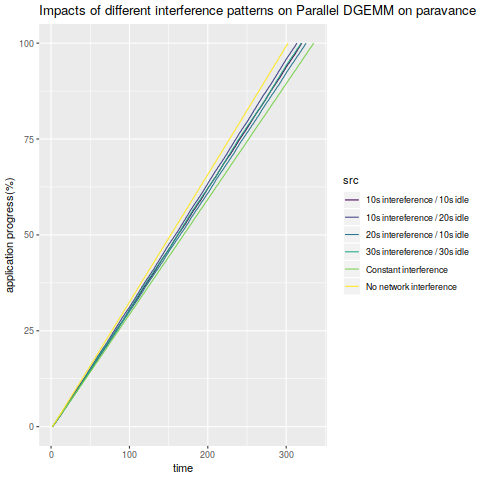

In [41]:
%%R 
# %%R -w 12 -h 7 --units in
library(tidyverse)
library(ggplot2)
library(viridis)

test =  read_csv("../experiments/g5k/data_dirty/paravance/paravance_80K_256ranks_1bcast_50subdiv_bintree/256c_no_kali/07bc122e/mpi_progress.csv") %>%
                  mutate(src = "No network interference") %>% 
        bind_rows( read_csv("../experiments/g5k/data_dirty/paravance/paravance_80K_256ranks_1bcast_50subdiv_bintree/256c_noper/1507cfb1/mpi_progress.csv") %>%
                  mutate(src = "Constant interference") ) %>% 
        bind_rows( read_csv("../experiments/g5k/data_dirty/paravance/paravance_80K_256ranks_1bcast_50subdiv_bintree/256c_per10s/35fa5068/mpi_progress.csv") %>%
                  mutate(src = "10s intereference / 10s idle") ) %>%
        bind_rows( read_csv("../experiments/g5k/data_dirty/paravance/paravance_80K_256ranks_1bcast_50subdiv_bintree/256c_periods30s/3ebe949a/mpi_progress.csv") %>%
                  mutate(src = "30s intereference / 30s idle") ) %>%
        bind_rows( read_csv("../experiments/g5k/data_dirty/paravance/paravance_80K_256ranks_1bcast_50subdiv_bintree/256c_per10sidle20sinter/0b71b530/mpi_progress.csv") %>%
                  mutate(src = "20s intereference / 10s idle") ) %>%
        bind_rows( read_csv("../experiments/g5k/data_dirty/paravance/paravance_80K_256ranks_1bcast_50subdiv_bintree/256c_per20sidle10sinter/53efc33e/mpi_progress.csv") %>%
                  mutate(src = "10s intereference / 20s idle") )
        
test = test %>% mutate(progress = loop/max(loop)*100)
test %>% ggplot(aes(x = max_comp_end, y = progress)) + ylab("application progress(%)") + xlab("time") + 
    geom_line(aes(color = src)) + ggtitle("Impacts of different interference patterns on Parallel DGEMM on paravance") + 
    scale_colour_viridis_d() + ggsave("/tmp/progress.png")

/nix/store/bz5kg95lm41njiddm8sp12jgwds1mqhi-python3-3.7.3-env/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:155: RRuntimeWarning: Parsed with column specification:
cols(
  ignore = col_character(),
  rank = col_double(),
  action = col_character(),
  action_event = col_character(),
  loop = col_double(),
  time = col_double()
)

  warnings.warn(x, RRuntimeWarning)
/nix/store/bz5kg95lm41njiddm8sp12jgwds1mqhi-python3-3.7.3-env/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:155: RRuntimeWarning: Saving 12 x 7 in image

  warnings.warn(x, RRuntimeWarning)


# A tibble: 614,656 x 6
   ignore  rank action action_event  loop  time
   <chr>  <dbl> <chr>  <chr>        <dbl> <dbl>
 1 trace      0 mpi    end             -1 7877.
 2 trace      1 mpi    end             -1 7877.
 3 trace      2 mpi    end             -1 7877.
 4 trace      3 mpi    end             -1 7877.
 5 trace      4 mpi    end             -1 7877.
 6 trace      5 mpi    end             -1 7877.
 7 trace      6 mpi    end             -1 7877.
 8 trace      7 mpi    end             -1 7877.
 9 trace      8 mpi    end             -1 7877.
10 trace      9 mpi    end             -1 7877.
# … with 614,646 more rows
# A tibble: 204,800 x 7
   ignore  rank action  loop begin   end custom_color
   <chr>  <dbl> <chr>  <dbl> <dbl> <dbl>        <dbl>
 1 trace      0 bcast      0 7876. 7558.            0
 2 trace      1 bcast      0 7558. 7558.            0
 3 trace      2 bcast      0 7558. 7558.            0
 4 trace      3 bcast      0 7558. 7558.            0
 5 trace      4 bcast    

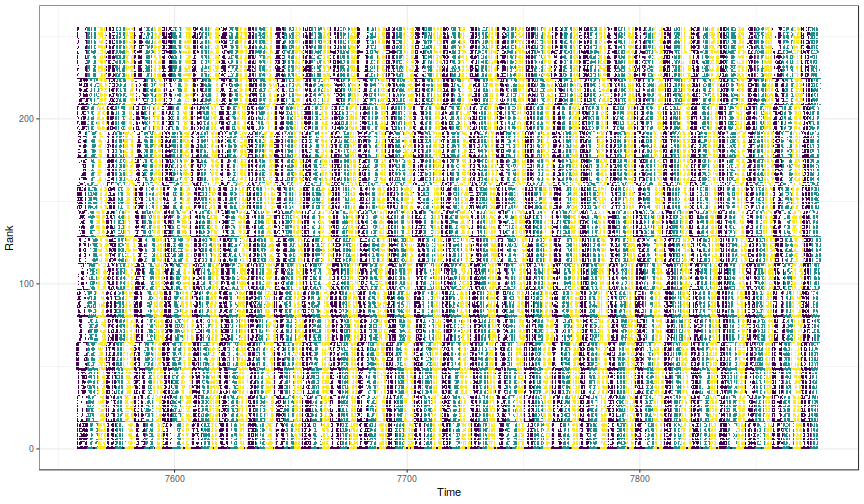

In [42]:
%%R -w 12 -h 7 --units in
library(tidyverse)
library(ggplot2)
library(viridis)

test =  read_csv("../experiments/g5k/data_dirty/paravance/paravance_80K_256ranks_1bcast_50subdiv_bintree/256c_per10s/48b49490/mpi.progress.full")

test = test %>% arrange(loop, rank) # %>% filter(loop > 100 & loop < 110) 

print(test)

# com = test %>% select(loop, min_bcast_begin, max_bcast_end)
# cpu = test %>% select(loop, min_comp_begins, max_comp_end)

s = test %>% spread(action_event, time) %>% arrange(loop, rank) %>% mutate(begin = ifelse(action == "bcast", lag(end), begin)) %>% filter(action == "bcast")
s = s %>% mutate(custom_color = ( as.integer(loop/10) * 37) %% 3) # (loop*37) %% 13)

print(s)

ggplot() + 
    geom_rect(data = s, aes(xmin = begin, ymin = rank + 0.1, ymax = rank + 0.9, xmax = end, 
                            fill = as.factor(custom_color))) +
    ylab("Rank") + xlab("Time") + scale_fill_viridis_d(end = 1) +
    theme_bw() +
    theme(legend.position = "none") +
    ggsave("/tmp/cpu_comm.png") 


# Details of 1 instance for each differents kind of interferences

## periodic 30s interferences / 30s idle

/nix/store/bz5kg95lm41njiddm8sp12jgwds1mqhi-python3-3.7.3-env/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:155: RRuntimeWarning: Parsed with column specification:
cols(
  `#timestamp` = col_double(),
  cpu_cycles = col_double(),
  instructions = col_double(),
  rxp = col_double(),
  rxb = col_double(),
  txp = col_double(),
  txb = col_double(),
  X8 = col_logical()
)

  warnings.warn(x, RRuntimeWarning)
/nix/store/bz5kg95lm41njiddm8sp12jgwds1mqhi-python3-3.7.3-env/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:155: RRuntimeWarning: Saving 12 x 8 in image

  warnings.warn(x, RRuntimeWarning)


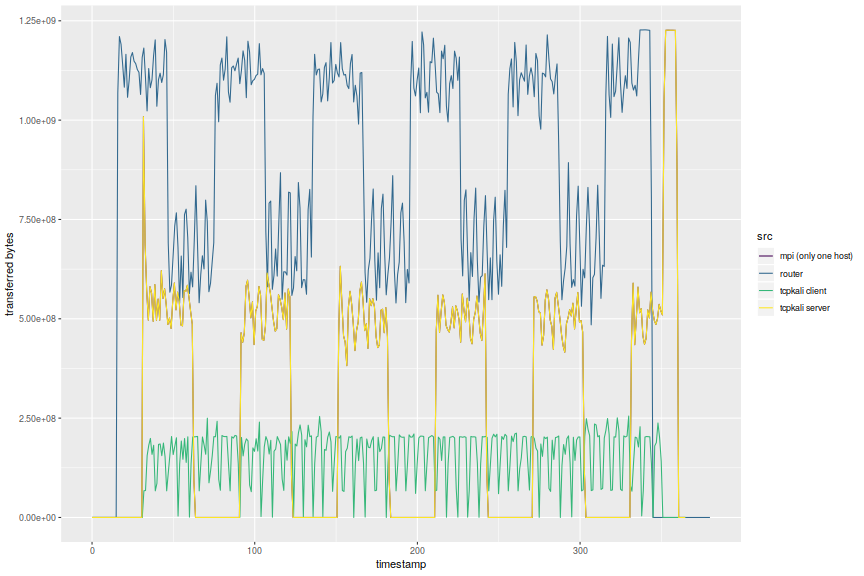

In [43]:
%%R -w 12 -h 8 --units in
library(tidyverse)
library(viridis)

instance = "../experiments/g5k/data_dirty/paravance/paravance_80K_256ranks_1bcast_50subdiv_bintree/256c_periods30s/17129fbc/"

test = read_table2(paste0(instance, "paravance-37.rennes.grid5000.fr.eno1.mojitos.csv")) %>% 
        rename(timestamp = "#timestamp") %>% mutate(src = "router", timestamp = timestamp - min(timestamp)) %>% 
    bind_rows( read_table2(paste0(instance, "paravance-39.rennes.grid5000.fr.eno2.mojitos.csv")) %>%
        rename(timestamp = "#timestamp") %>%  mutate(src = "tcpkali client", timestamp = timestamp - min(timestamp)) ) %>% 
        bind_rows( read_table2(paste0(instance, "paravance-38.rennes.grid5000.fr.eno2.mojitos.csv")) %>%
        rename(timestamp = "#timestamp") %>%  mutate(src = "tcpkali server", timestamp = timestamp - min(timestamp)) ) %>% 
    bind_rows( read_table2(paste0(instance, "paravance-38.rennes.grid5000.fr.eno2.mojitos.csv")) %>%
        rename(timestamp = "#timestamp") %>% mutate(src = "mpi (only one host)", timestamp = timestamp - min(timestamp)) ) 

test %>% mutate() %>% ggplot(aes(x = timestamp, y = txb)) + 
    ylab("transferred bytes") + 
    geom_line(aes(color = src)) + 
    scale_colour_viridis_d() + ggsave("/tmp/plot.png") 

## periodic 30s interferences / 30s idle

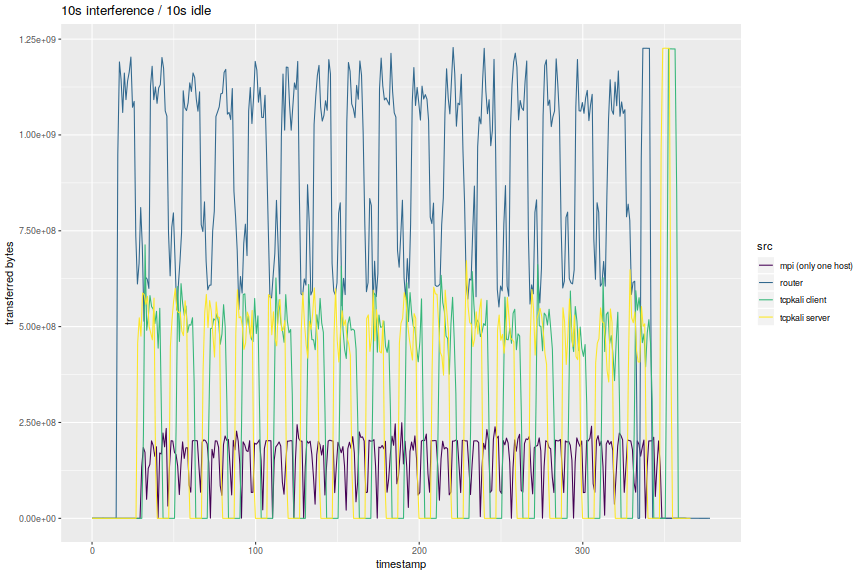

In [44]:
%%R -w 12 -h 8 --units in
library(tidyverse)
library(viridis)

instance = "../experiments/g5k/data_dirty/paravance/paravance_80K_256ranks_1bcast_50subdiv/256c_per10s/8f0c4492/"

test = read_table2(paste0(instance, "paravance-1.rennes.grid5000.fr.eno1.mojitos.csv")) %>% 
        rename(timestamp = "#timestamp") %>% mutate(src = "router", timestamp = timestamp - min(timestamp)) %>% 
    bind_rows( read_table2(paste0(instance, "paravance-10.rennes.grid5000.fr.eno2.mojitos.csv")) %>%
        rename(timestamp = "#timestamp") %>%  mutate(src = "tcpkali client", timestamp = timestamp - min(timestamp)) ) %>% 
        bind_rows( read_table2(paste0(instance, "paravance-26.rennes.grid5000.fr.eno2.mojitos.csv")) %>%
        rename(timestamp = "#timestamp") %>%  mutate(src = "tcpkali server", timestamp = timestamp - min(timestamp)) ) %>% 
    bind_rows( read_table2(paste0(instance, "paravance-13.rennes.grid5000.fr.eno2.mojitos.csv")) %>%
        rename(timestamp = "#timestamp") %>% mutate(src = "mpi (only one host)", timestamp = timestamp - min(timestamp)) ) 

test %>% mutate() %>% ggplot(aes(x = timestamp, y = txb)) + 
    ylab("transferred bytes") + 
    geom_line(aes(color = src)) + 
    ggtitle("10s interference / 10s idle") +
    scale_colour_viridis_d() + ggsave("/tmp/plot.png") 

## No Interference

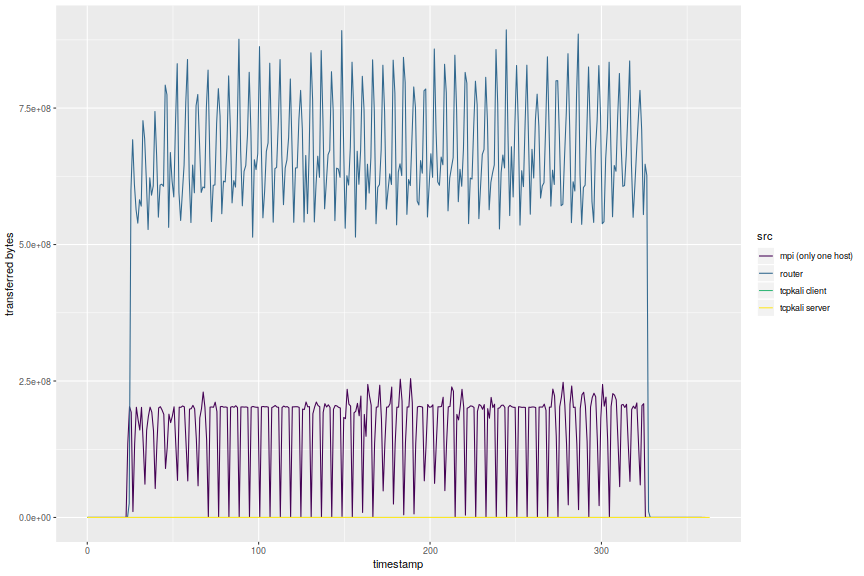

In [45]:
%%R -w 12 -h 8 --units in
library(tidyverse)
library(viridis)

instance = "../experiments/g5k/data_dirty/paravance/paravance_80K_256ranks_1bcast_50subdiv/256c_no_kali/3f44e0e0/"

test = read_table2(paste0(instance, "paravance-1.rennes.grid5000.fr.eno1.mojitos.csv")) %>% 
        rename(timestamp = "#timestamp") %>% mutate(src = "router", timestamp = timestamp - min(timestamp)) %>% 
    bind_rows( read_table2(paste0(instance, "paravance-10.rennes.grid5000.fr.eno2.mojitos.csv")) %>%
        rename(timestamp = "#timestamp") %>%  mutate(src = "tcpkali client", timestamp = timestamp - min(timestamp)) ) %>% 
        bind_rows( read_table2(paste0(instance, "paravance-26.rennes.grid5000.fr.eno2.mojitos.csv")) %>%
        rename(timestamp = "#timestamp") %>%  mutate(src = "tcpkali server", timestamp = timestamp - min(timestamp)) ) %>% 
    bind_rows( read_table2(paste0(instance, "paravance-13.rennes.grid5000.fr.eno2.mojitos.csv")) %>%
        rename(timestamp = "#timestamp") %>% mutate(src = "mpi (only one host)", timestamp = timestamp - min(timestamp)) ) 

test %>% mutate() %>% ggplot(aes(x = timestamp, y = txb)) + 
    ylab("transferred bytes") + 
    geom_line(aes(color = src)) + 
    scale_colour_viridis_d() + ggsave("/tmp/plot.png") 

## Constant interference

In [46]:
%%R -w 12 -h 8 --units in
library(tidyverse)
library(viridis)

instance = "../experiments/g5k/data_dirty/paravance/paravance_80K_256ranks_1bcast_50subdiv/256c_noper/1b2e1453/"

test = read_table2(paste0(instance, "paravance-1.rennes.grid5000.fr.eno1.mojitos.csv")) %>% 
        rename(timestamp = "#timestamp") %>% mutate(src = "router", timestamp = timestamp - min(timestamp)) %>% 
    bind_rows( read_table2(paste0(instance, "paravance-10.rennes.grid5000.fr.eno2.mojitos.csv")) %>%
        rename(timestamp = "#timestamp") %>%  mutate(src = "tcpkali client", timestamp = timestamp - min(timestamp)) ) %>% 
        bind_rows( read_table2(paste0(instance, "paravance-26.rennes.grid5000.fr.eno2.mojitos.csv")) %>%
        rename(timestamp = "#timestamp") %>%  mutate(src = "tcpkali server", timestamp = timestamp - min(timestamp)) ) %>% 
    bind_rows( read_table2(paste0(instance, "paravance-13.rennes.grid5000.fr.eno2.mojitos.csv")) %>%
        rename(timestamp = "#timestamp") %>% mutate(src = "mpi (only one host)", timestamp = timestamp - min(timestamp)) ) 

test %>% mutate() %>% ggplot(aes(x = timestamp, y = txb)) + 
    ylab("transferred bytes") + 
    geom_line(aes(color = src)) + 
    scale_colour_viridis_d() + ggsave("/tmp/plot.png") 


Error: '../experiments/g5k/data_dirty/paravance/paravance_80K_256ranks_1bcast_50subdiv/256c_noper/1b2e1453/paravance-1.rennes.grid5000.fr.eno1.mojitos.csv' does not exist in current working directory ('/home/adfaure/Projects/ptask-eval/analysis').


/nix/store/bz5kg95lm41njiddm8sp12jgwds1mqhi-python3-3.7.3-env/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:155: RRuntimeWarning: Error: '../experiments/g5k/data_dirty/paravance/paravance_80K_256ranks_1bcast_50subdiv/256c_noper/1b2e1453/paravance-1.rennes.grid5000.fr.eno1.mojitos.csv' does not exist in current working directory ('/home/adfaure/Projects/ptask-eval/analysis').

  warnings.warn(x, RRuntimeWarning)
/nix/store/bz5kg95lm41njiddm8sp12jgwds1mqhi-python3-3.7.3-env/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:155: RRuntimeWarning: In addition: 
  warnings.warn(x, RRuntimeWarning)
/nix/store/bz5kg95lm41njiddm8sp12jgwds1mqhi-python3-3.7.3-env/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:155: RRuntimeWarning: There were 18 warnings (use warnings() to see them)
  warnings.warn(x, RRuntimeWarning)
/nix/store/bz5kg95lm41njiddm8sp12jgwds1mqhi-python3-3.7.3-env/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:155: RRuntimeWarning: 

  warnings.warn

## 10s interferenc / 20s idle

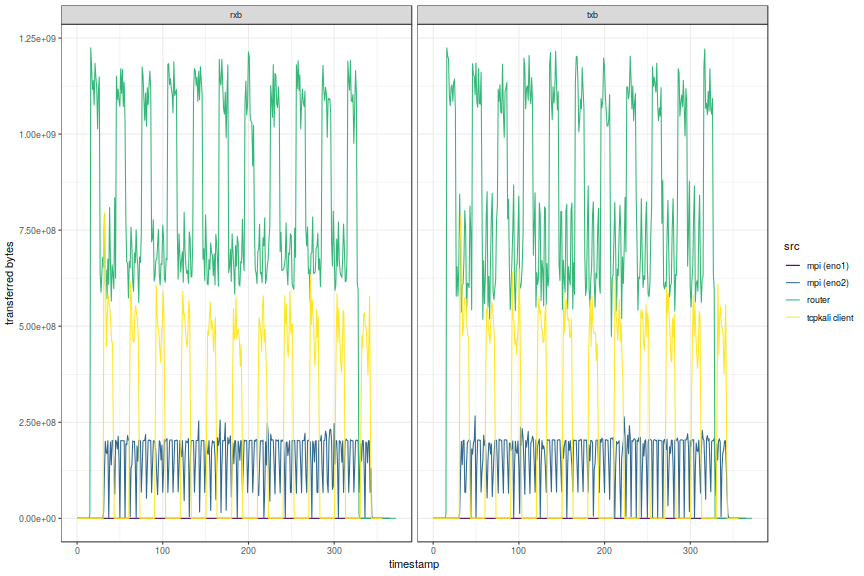

In [47]:
%%R -w 12 -h 8 --units in
library(tidyverse)
library(viridis)

instance = "../experiments/g5k/data_dirty/paravance/paravance_80K_256ranks_1bcast_50subdiv/256c_per20sidle10sinter/9f93c63f/"

test = read_table2(paste0(instance, "paravance-1.rennes.grid5000.fr.eno1.mojitos.csv")) %>% 
        rename(timestamp = "#timestamp") %>% mutate(src = "router", timestamp = timestamp - min(timestamp)) %>% 
        bind_rows( read_table2(paste0(instance, "paravance-10.rennes.grid5000.fr.eno2.mojitos.csv")) %>%
        rename(timestamp = "#timestamp") %>%  mutate(src = "tcpkali client", timestamp = timestamp - min(timestamp)) ) %>% 
        bind_rows( read_table2(paste0(instance, "paravance-12.rennes.grid5000.fr.eno2.mojitos.csv")) %>%
        rename(timestamp = "#timestamp") %>%  mutate(src = "mpi (eno2)", timestamp = timestamp - min(timestamp)) ) %>% 
        bind_rows( read_table2(paste0(instance, "paravance-12.rennes.grid5000.fr.eno1.mojitos.csv")) %>%
        rename(timestamp = "#timestamp") %>% mutate(src = "mpi (eno1)", timestamp = timestamp - min(timestamp)) )

test %>% mutate() %>% select(timestamp, src, txb, rxb) %>%
    gather(col, val, -timestamp, -src) %>% ggplot(aes(x = timestamp, y = val)) +
    ylab("transferred bytes") + facet_wrap(.~col) +
    geom_line(aes(color = src)) + theme_bw() +
    scale_colour_viridis_d() + ggsave("/tmp/plot.png")
    

In [48]:
%%R -w 12 -h 8 --units in
library(tidyverse)
library(viridis)

instance = "../experiments/g5k/data_dirty/paravance/paravance_80K_256ranks_1bcast_50subdiv/256c_per20sidle10sinter/d91c789a/"

test = read_table2(paste0(instance, "paravance-1.rennes.grid5000.fr.eno1.mojitos.csv")) %>% 
        rename(timestamp = "#timestamp") %>% mutate(src = "router", timestamp = timestamp - min(timestamp)) %>% 
    bind_rows( read_table2(paste0(instance, "paravance-10.rennes.grid5000.fr.eno2.mojitos.csv")) %>%
        rename(timestamp = "#timestamp") %>%  mutate(src = "tcpkali client", timestamp = timestamp - min(timestamp)) ) %>% 
        bind_rows( read_table2(paste0(instance, "paravance-26.rennes.grid5000.fr.eno2.mojitos.csv")) %>%
        rename(timestamp = "#timestamp") %>%  mutate(src = "tcpkali server", timestamp = timestamp - min(timestamp)) ) %>% 
    bind_rows( read_table2(paste0(instance, "paravance-11.rennes.grid5000.fr.eno1.mojitos.csv")) %>%
        rename(timestamp = "#timestamp") %>% mutate(src = "mpi (only one host)", timestamp = timestamp - min(timestamp)) ) 

test %>% mutate() %>% ggplot(aes(x = timestamp, y = rxb)) + 
    ylab("transferred bytes") + 
    geom_line(aes(color = src)) + 
    scale_colour_viridis_d() + ggtitle("20s idle / 10s interference")


Error: '../experiments/g5k/data_dirty/paravance/paravance_80K_256ranks_1bcast_50subdiv/256c_per20sidle10sinter/d91c789a/paravance-1.rennes.grid5000.fr.eno1.mojitos.csv' does not exist in current working directory ('/home/adfaure/Projects/ptask-eval/analysis').


/nix/store/bz5kg95lm41njiddm8sp12jgwds1mqhi-python3-3.7.3-env/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:155: RRuntimeWarning: Error: '../experiments/g5k/data_dirty/paravance/paravance_80K_256ranks_1bcast_50subdiv/256c_per20sidle10sinter/d91c789a/paravance-1.rennes.grid5000.fr.eno1.mojitos.csv' does not exist in current working directory ('/home/adfaure/Projects/ptask-eval/analysis').

  warnings.warn(x, RRuntimeWarning)
/nix/store/bz5kg95lm41njiddm8sp12jgwds1mqhi-python3-3.7.3-env/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:155: RRuntimeWarning: Warning messages:

  warnings.warn(x, RRuntimeWarning)
/nix/store/bz5kg95lm41njiddm8sp12jgwds1mqhi-python3-3.7.3-env/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:155: RRuntimeWarning: 1: Missing column names filled in: 'X8' [8] 

  warnings.warn(x, RRuntimeWarning)
/nix/store/bz5kg95lm41njiddm8sp12jgwds1mqhi-python3-3.7.3-env/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:155: RRuntimeWarning: 2: Mi

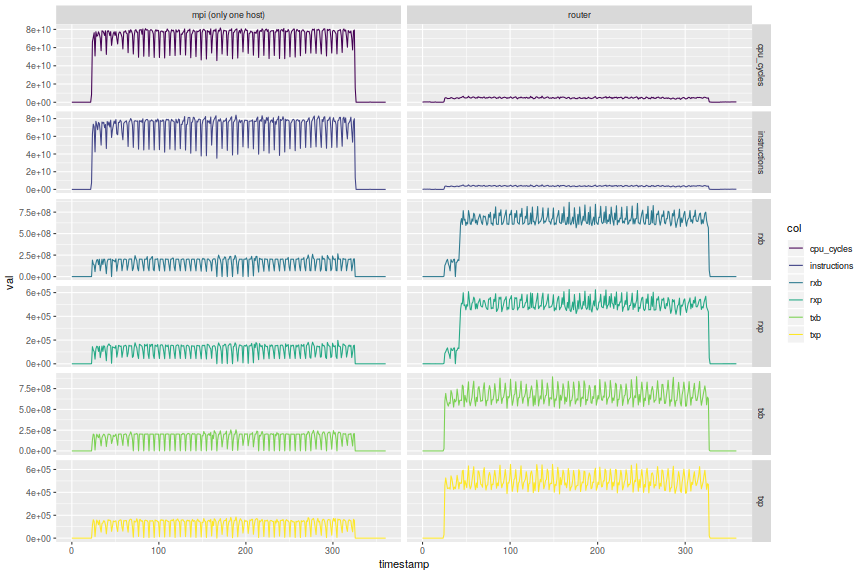

In [49]:
%%R -w 12 -h 8 --units in
library(tidyverse)
library(viridis)

instance = "../experiments/g5k/data_dirty/paravance/paravance_80K_256ranks_1bcast_50subdiv/256c_no_kali/3f44e0e0/"

test = read_table2(paste0(instance, "paravance-1.rennes.grid5000.fr.eno1.mojitos.csv")) %>% 
        rename(timestamp = "#timestamp") %>% mutate(src = "router", timestamp = timestamp - min(timestamp)) %>% 
       bind_rows( read_table2(paste0(instance, "paravance-13.rennes.grid5000.fr.eno2.mojitos.csv")) %>%
        rename(timestamp = "#timestamp") %>% mutate(src = "mpi (only one host)", timestamp = timestamp - min(timestamp)) )

        
test %>% select(-X8) %>% gather(col, val, -timestamp, -src) %>% ggplot(aes(x = timestamp, y = val)) + 
    ylab("val") + 
    geom_line(aes(color = col)) + facet_grid(col~src, scales="free") +
    scale_colour_viridis_d() + ggsave("/tmp/plot.png") 

# Anomalies

I found out that some nodes have activity on the eno1 interface.
paravance-33,29 and 13.

I am working on a fix.

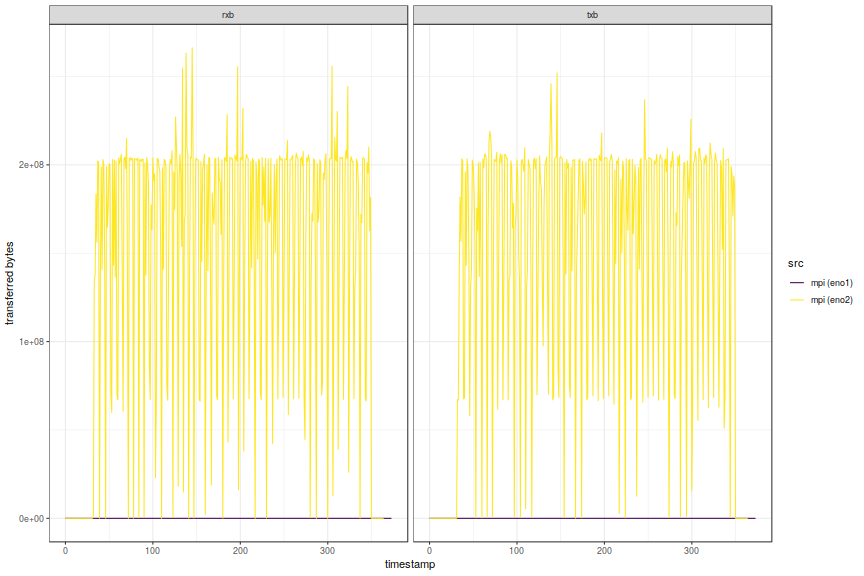

In [50]:
%%R -w 12 -h 8 --units in
library(tidyverse)
library(viridis)

instance = "../experiments/g5k/data_dirty/paravance/paravance_80K_256ranks_1bcast_50subdiv_bintree/256c_periods30s/3ebe949a/"

test = read_table2(paste0(instance, "paravance-39.rennes.grid5000.fr.eno1.mojitos.csv")) %>% 
        rename(timestamp = "#timestamp") %>% mutate(src = "mpi (eno1)", timestamp = timestamp - min(timestamp)) %>%
        # bind_rows( read_table2(paste0(instance, "paravance-1.rennes.grid5000.fr.eno2.mojitos.csv")) %>%
        # rename(timestamp = "#timestamp") %>%  mutate(src = "router eno2", timestamp = timestamp - min(timestamp)) ) %>% 
        bind_rows( read_table2(paste0(instance, "paravance-39.rennes.grid5000.fr.eno2.mojitos.csv")) %>%
        rename(timestamp = "#timestamp") %>%  mutate(src = "mpi (eno2)", timestamp = timestamp - min(timestamp)) )
        # bind_rows( read_table2(paste0(instance, "paravance-13.rennes.grid5000.fr.eno1.mojitos.csv")) %>%
        # rename(timestamp = "#timestamp") %>% mutate(src = "mpi (eno1)", timestamp = timestamp - min(timestamp)) ) 

test %>% mutate() %>% select(timestamp, src, txb, rxb) %>%
    gather(col, val, -timestamp, -src) %>% ggplot(aes(x = timestamp, y = val)) +
    ylab("transferred bytes") + facet_wrap(.~col) +
    geom_line(aes(color = src)) + theme_bw() +
    scale_colour_viridis_d() + ggsave("/tmp/plot.png")